In [1]:
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [8]:
# Reading with pandas didn't work, so doing this instead:
#
# IMPORTANT: the delimiter for the county csv data is ;
def read_csv(path, delim):
    with open(path) as f:
        reader = csv.reader(f, delimiter=delim)
        rows = list(reader)
        header= rows[0]
        data = rows[1:]
        return header, data

In [9]:
path_to_csv = "./usa-2016-presidential-election-by-county.csv" # replace with your path
header, data = read_csv(path_to_csv, ';') 

In [10]:
# Compute state average for each feature
all_data = pd.DataFrame(data, columns=header)
#all_data = pd.read_csv("aligned_features.csv")
states = list(set(all_data["State"]))
state_average = {s:{f:None for f in header} for s in states}
for feature in header[2:]:
    for state in states:
        missing = all_data[(all_data["State"] == state) & (all_data[feature] == '')]
        if not missing.empty:
            try:
                avg = all_data[(all_data["State"] == state) & (all_data[feature] != '')][feature].astype(np.float32)
                # Do average over all states if it is empty
                if avg.empty:
                    avg = all_data[(all_data[feature] != '')][feature].astype(np.float32)
                state_average[state][feature] = avg.mean()
                #print(state_average[state][feature], print(avg))
                
            except:
                print("Feature {} is not numeric".format(feature))


Feature Temp Bins is not numeric
Feature Temp Bins is not numeric
Feature Temp Bins is not numeric
Feature Temp Bins is not numeric
Feature Temp Bins is not numeric
Feature Temp Bins is not numeric
Feature Temp Bins is not numeric
Feature Temp Bins is not numeric
Feature Temp Bins is not numeric
Feature Temp Bins is not numeric
Feature Temp Bins is not numeric
Feature Temp Bins is not numeric
Feature Temp Bins is not numeric
Feature Temp Bins is not numeric
Feature Temp Bins is not numeric
Feature Temp Bins is not numeric
Feature Temp Bins is not numeric
Feature Temp Bins is not numeric
Feature Temp Bins is not numeric
Feature Temp Bins is not numeric
Feature Temp Bins is not numeric
Feature Temp Bins is not numeric
Feature Temp Bins is not numeric
Feature Temp Bins is not numeric
Feature Temp Bins is not numeric
Feature Temp Bins is not numeric
Feature Temp Bins is not numeric
Feature Temp Bins is not numeric
Feature Temp Bins is not numeric
Feature Temp Bins is not numeric
Feature Te

In [11]:
# Use better function later maybe
# Update: We decided to use handpicked 32 features instead of interpolate missing data
def fill_in_row(row):
    state = row['State']
    for key in row.index:
        if row[key] == '':
            row[key] = state_average[state][key]
    return row
            
all_data.apply(fill_in_row, axis = 1)

,State,ST,Fips,County,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),...,total08,total12,other08,other12,Other12 Frac,Other08 Frac,Rep12 Frac2,Rep08 Frac2,Dem12 Frac2,Dem08 Frac2
0,Georgia,GA,13231,"Pike County, Georgia",8,8675,1575,1356,6547,6668,...,8203,8109,81,85,0.010482180293501,0.009874436181884001,0.8310069790628111,0.806082245752277,0.16899302093718802,0.193917754247722
1,Utah,UT,49051,"Wasatch County, Utah",38,12120,2892,2191,5430,7220,...,8531,9589,209,178,0.0185629366983,0.024498886414253,0.767187333970885,0.6524873828406631,0.23281266602911402,0.347512617159336
2,Washington,WA,53021,"Franklin County, Washington",15,20584,7361,8398,12037,13748,...,19696,22643,298,497,0.021949388331934,0.015129975629569001,0.6207893073241211,0.6205278894731411,0.37921069267587804,0.37947211052685803
3,Nebraska,NE,31119,"Madison County, Nebraska",22,13956,4142,3485,9655,10062,...,14045,13885,248,338,0.024342815988476003,0.017657529369882,0.742747471764966,0.69978980937885,0.25725252823503303,0.300210190621149
4,Florida,FL,12045,"Gulf County, Florida",9,7279,2149,2014,4980,4995,...,7205,7108,76,99,0.013927968486212002,0.010548230395558,0.7126551576544441,0.698555197082339,0.287344842345555,0.30144480291766
5,Georgia,GA,13267,"Tattnall County, Georgia",8,6879,1932,1897,4730,4706,...,6714,6667,52,64,0.009599520023998,0.007745010425975001,0.7127063456004841,0.7099969978985291,0.28729365439951504,0.290003002101471
6,Wisconsin,WI,55083,"Oconto County, Wisconsin",28,19924,9927,8865,8755,10741,...,18968,19859,286,253,0.012739815700689001,0.015078026149304001,0.547842497194736,0.468632908682153,0.452157502805263,0.5313670913178461
7,Alabama,AL,01059,"Franklin County, Alabama",26,11955,3469,3171,8048,7567,...,11693,10881,176,143,0.013142174432497001,0.015051740357478001,0.704693611473272,0.698793088477902,0.295306388526727,0.301206911522097
8,Washington,WA,53015,"Cowlitz County, Washington",30,45485,24597,22726,19554,20746,...,45229,44620,1078,1148,0.025728372926938,0.023834265626036,0.47722672064777305,0.44288917578310805,0.5227732793522261,0.5571108242168921
9,Missouri,MO,29061,"Daviess County, Missouri",7,3689,1400,1125,2263,2290,...,3786,3521,123,106,0.030105083783016004,0.032488114104595005,0.6705710102489011,0.617799617799617,0.329428989751098,0.38220038220038205


In [12]:
# Outdated:
numeric_features = []
for feature in header:
    try:
        subtable = all_data[feature].astype(np.float32)
        numeric_features.append(feature)
    except:
        pass
numeric_features.remove("Lat Bins")
fips = all_data["Fips"].values
df = all_data[numeric_features].astype(np.float32)

df = pd.read_csv("aligned_features.csv")
# Normalize data
cols = df.columns
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_df = pd.DataFrame(x_scaled)
normalized_df.columns = cols
normalized_df['Fips'] = pd.Series(fips)
normalized_df.head() # Normalized data

,FIPS,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,...,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,Median Age,lon,lat,Adult.obesity,Diabetes,Uninsured,Unemployment,Fips
0,0.000000,0.272374,0.750223,0.271084,0.192935,0.752074,0.539281,0.776112,0.205575,0.004657,...,0.342697,0.330150,0.352185,0.793313,0.442423,0.500000,0.527950,0.301676,0.207273,13231
1,0.000036,0.227626,0.791258,0.347892,0.236413,0.681106,0.478023,0.845915,0.110918,0.006985,...,0.385768,0.257844,0.475578,0.781352,0.378235,0.387931,0.527950,0.377095,0.218182,49051
2,0.000073,0.533074,0.511151,0.147590,0.163043,0.550230,0.370912,0.464323,0.540070,0.004075,...,0.258427,0.721692,0.398458,0.806767,0.419660,0.695402,0.677019,0.441341,0.378182,53021
3,0.000109,0.482490,0.557538,0.094880,0.070652,0.540092,0.482411,0.751810,0.261324,0.002328,...,0.599251,0.642565,0.406170,0.788073,0.458820,0.609195,0.484472,0.360335,0.247273,31119
4,0.000145,0.478599,0.561106,0.132530,0.114130,0.635945,0.498551,0.896070,0.012195,0.006985,...,0.516854,0.448840,0.406170,0.794152,0.491699,0.497126,0.664596,0.418994,0.196364,12045


In [33]:
# Only start running from this cell onwards. The previous cells are past experimentation

df = pd.read_csv("aligned_features.csv")
fips = df['FIPS']
# Normalize data
cols = df.columns
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_df = pd.DataFrame(x_scaled)
normalized_df.columns = cols
normalized_df['FIPS'] = fips


# Read in labels
labels = pd.read_csv("../label_process/labels/deaths_seriousness_1")
normalized_df["Labels"] = labels["Label"]
normalized_df

for i in range(2999):
    if labels.iloc[i]["FIPS"] != df.iloc[i]["FIPS"]:
        print(i)

       FIPS  Less Than High School Diploma  At Least High School Diploma  \
0      1001                           14.7                          85.3   
1      1003                           12.4                          87.6   
2      1005                           28.1                          71.9   
3      1007                           25.5                          74.5   
4      1009                           25.3                          74.7   
5      1011                           25.3                          74.7   
6      1013                           25.2                          74.8   
7      1015                           21.5                          78.5   
8      1017                           28.2                          71.8   
9      1019                           26.6                          73.4   
10     1021                           24.1                          75.9   
11     1023                           28.9                          71.1   
12     1025 

In [4]:
table = normalized_df[normalized_df['Labels'].notnull()]
feats = list(table.columns)
feats.remove("FIPS")
feat_table = table[feats]
all_features = np.array(feat_table[feats])
X = all_features[:,:-1]
y = all_features[:,-1]

Index(['African American Population', 'Uninsured',
       'Production.transportation.and.material.moving.occupations', 'lat',
       'Adults 65 and Older Living in Poverty', 'Other Race or Races',
       'White (Not Latino) Population', 'Sales.and.office.occupations',
       'Poverty.Rate.below.federal.poverty.threshold',
       'Construction.extraction.maintenance.and.repair.occupations',
       'Child.Poverty.living.in.families.below.the.poverty.line',
       'Adult.obesity', 'Total Population',
       'Children Under 6 Living in Poverty',
       'Farming.fishing.and.forestry.occupations', 'Diabetes',
       'School Enrollment', 'lon',
       'Management.professional.and.related.occupations',
       'Service.occupations', 'Median Earnings 2010',
       'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
       'At Least Bachelors's Degree', 'Native American Population',
       'Graduate Degree', 'Gini.Coefficient', 'Asian American Population',
       'Latino Population', 'Median Age'

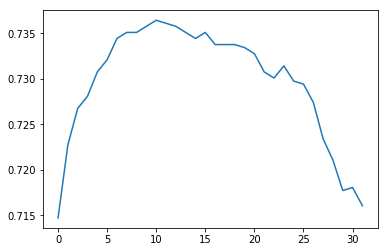

In [6]:
# wrapper_method:
folds = 10
size = len(X) // folds
num_features = X.shape[1]
included_features = []
overall_scores = []
# ADD COUNTY AND STATE FIRST 2 COLS
for k in range(32):
    feat_scores = []
    for i in range(num_features):
        if i in included_features:
            continue
        scores = []
        for s in range(folds):
            train = np.concatenate((X[0:s*size], X[(s+1) * size:]), axis = 0)
            train_labels = np.concatenate((y[0:s*size], y[(s+1) * size:]), axis = 0)
            test = X[s * size : (s+1) * size]
            test_labels = y[s * size : (s+1) * size]
            t = train[:, included_features]
            tst = test[:, included_features]

            train = np.concatenate((train[:,i:i+1], t), axis = 1)
            test = np.concatenate((test[:,i:i+1], tst), axis = 1)

            model = LogisticRegression(solver='lbfgs', max_iter=10000).fit(train, train_labels)
            scores.append(model.score(test, test_labels))
        feat_scores.append((sum(scores)/len(scores), i))

    included_features.append(max(feat_scores, key = lambda x: x[0])[1])
    overall_scores.append(max(feat_scores, key = lambda x: x[0])[0])
print(feat_table.columns[included_features])
plt.plot(overall_scores)
plt.show()


In [10]:
folds = 10
size = len(X) // folds
num_features = X.shape[1]


scores = []
for s in range(folds):
    train = np.concatenate((X[0:s*size], X[(s+1) * size:]), axis = 0)
    train_labels = np.concatenate((y[0:s*size], y[(s+1) * size:]), axis = 0)
    test = X[s * size : (s+1) * size]
    test_labels = y[s * size : (s+1) * size]
    model = LogisticRegression(solver='lbfgs', max_iter=10000).fit(train[:,included_features[:12]], train_labels)
    scores.append(model.score(test[:,included_features[:12]], test_labels))

print(sum(scores)/len(scores))

0.7361204013377927


In [38]:
# Save features in order of importance:
table_cols = feat_table.columns[included_features]
new_df = np.zeros_like(X)
for i, f in enumerate(table_cols):
    new_df[:,i] = list(table[f])

sorted_feats = pd.DataFrame(new_df)
sorted_feats.columns = table_cols
new_col = fips
sorted_feats.insert(loc=0, column='FIPS', value=fips)
sorted_feats.to_csv("aligned_features_sorted.csv", index=False)

In [9]:
# logistic_model = LogisticRegression(solver='lbfgs', max_iter=10000)
# model = SelectFromModel(logistic_model).fit(X,y)
# X_new = model.transform(X)
# important_feats = model.get_support()
# important_feats = np.append(important_feats, [False]) # To not include labels
# print(feat_table.columns[important_feats])

# new_logistic = LogisticRegression(solver='lbfgs', max_iter=10000).fit(X_new, y)
# new_logistic.predict(X_new)

Index(['Graduate Degree', 'Median Earnings 2010',
       'White (Not Latino) Population', 'African American Population',
       'Native American Population', 'Other Race or Races',
       'Adults 65 and Older Living in Poverty',
       'Poverty.Rate.below.federal.poverty.threshold', 'Gini.Coefficient',
       'Construction.extraction.maintenance.and.repair.occupations',
       'Median Age', 'lon', 'Adult.obesity', 'Uninsured'],
      dtype='object')


array([0., 0., 1., ..., 0., 0., 0.])